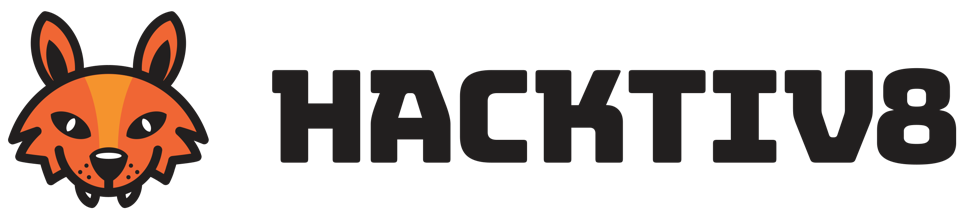

# Hacktiv8 Introduction to Python for Data Science Assignment 1

Title : Hacktiv8 Introduction to Python for Data Science Assignment 1 : Publication-Grade Plot\
Author : Citra Puspa Tria

## Publication-Grade Plot Introduction

The aim of this projects is to introduce you to data visualization with Python as concrete and as consistent as possible. Using what you’ve learned; download the London Crime Dataset from Kaggle. This dataset is a record of crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.

This dataset contains:
- `lsoa_code`: this represents a policing area
- `borough`: the london borough for which the statistic is related
- `major-category`: the major crime category
- `minor-category`: the minor crime category
- `value`: the count of crime for that particular borough, in that particular month
- `year`: the year of the summary statistic
- `month`: the month of the summary statistic

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you're able to make decisions using data in a scientific manner. And the important things, <b>Visualized the data</b>. Examples of questions can be:
- What is the change in the number of crime incidents from 2011 to 2016?
- What were the top 3 crimes per borough in 2016?
----

## Step 1: Import Modules

Pertama-tama, import seluruh module yang akan digunakan dalam analisis data

In [159]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from wordcloud import WordCloud, STOPWORDS
import folium

## Step 2: Import Dataset

Selanjutnya, import dataset yang telah diunduh dari link: https://www.kaggle.com/datasets/jboysen/london-crime

In [3]:
df = pd.read_csv('~/datasets/london_crime_by_lsoa.csv')

## Step 3: Exploring Dataset

In [5]:
# Melihat 5 data teratas dari dataset
df.head(5)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
# Melihat jumah baris dan kolom dari dataset
df.shape

(13490604, 7)

In [6]:
# Melihat informasi dasar dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [7]:
# Melihat jumlah nilai unik pada setiap kolom
df.nunique()

lsoa_code         4835
borough             33
major_category       9
minor_category      32
value              247
year                 9
month               12
dtype: int64

In [8]:
# Mendeskripsikan ukuran pemusatan dan penyebaran data, seperti mean, standar deviasi, dll
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [10]:
# Menggabungkan bulan dan tahun
df['date']=pd.to_datetime(df[['year', 'month']].assign(DAY=28))
df

,lsoa_code,borough,major_category,minor_category,value,year,month,date
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,2016-11-28
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,2016-11-28
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,2015-05-28
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,2016-03-28
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,2008-06-28
...,...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2,2015-02-28
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6,2015-06-28
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2,2011-02-28
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5,2011-05-28


In [11]:
# Melihat total kriminalitas tiap bulannya di setiap distrik
crime = pd.DataFrame(df.groupby(['date','borough'])['value'].sum().sort_values(ascending=False), index=None).reset_index()
crime

,date,borough,value
0,2012-07-28,Westminster,5428
1,2012-03-28,Westminster,5362
2,2011-12-28,Westminster,5333
3,2011-10-28,Westminster,5304
4,2011-11-28,Westminster,5277
...,...,...,...
3559,2009-09-28,City of London,0
3560,2008-04-28,City of London,0
3561,2009-04-28,City of London,0
3562,2010-05-28,City of London,0


In [13]:
# Melihat total kriminalitas mayor di tiap distrik
df_major = pd.DataFrame(df.groupby(['borough', 'major_category']).sum()['value'].sort_values()).reset_index()
df_major

,borough,major_category,value
0,City of London,Burglary,15
1,City of London,Criminal Damage,16
2,City of London,Other Notifiable Offences,17
3,Kingston upon Thames,Sexual Offences,18
4,Havering,Sexual Offences,19
...,...,...,...
290,Islington,Theft and Handling,107661
291,Southwark,Theft and Handling,109432
292,Lambeth,Theft and Handling,114899
293,Camden,Theft and Handling,140596


In [15]:
# Melihat total kriminalitas minor di tiap distrik
df_minor = pd.DataFrame(df.groupby(['borough', 'major_category', 'minor_category']).sum()['value'].sort_values()).reset_index()
df_minor

,borough,major_category,minor_category,value
0,City of London,Robbery,Business Property,1
1,Richmond upon Thames,Sexual Offences,Rape,2
2,Bexley,Sexual Offences,Rape,2
3,Sutton,Sexual Offences,Rape,3
4,City of London,Violence Against the Person,Offensive Weapon,3
...,...,...,...,...
1041,Southwark,Theft and Handling,Other Theft,42879
1042,Lambeth,Theft and Handling,Other Theft,44006
1043,Westminster,Theft and Handling,Other Theft Person,56756
1044,Camden,Theft and Handling,Other Theft,64265


Dari eksplorasi data di atas, dapat ditarik beberapa informasi, yaitu:
1. Terdapat 13490603 laporan kriminalitas dari tahun 2008 hingga 2016 dari 4835 wilayah kepolisian yang ada di 33 distrik di London
2. Dari 33 distrik, distrik Westminster mencatat laporan kriminalitas terbanyak, terutama saat bulan Juli 2012. Sedangkan distrik City of London merupakan distrik dengan catatan laporan kriminalitas tersedikit, bahkan ada beberapa bulan yang tidak ada catatan kriminalitasnya, seperti saat bulan Oktober tahun 2008.
3. Jika dilihat dari jenis kriminalitasnya, `Theft and Handling` merupakan jenis kriminalitas major yang paling sering terjadi dengan jenis kriminalitas minornya, yaitu `Other Theft`. Sedangkan jenis kriminalitas major `Robbery` dengan kriminalitas minornya `Business Property` merupakan kriminalitas dengan total terendah. 

## Step 4: Visualizing Data

---
### Histogram
---

Tentukan distribusi frekuensi total kriminalitas dari berbagai distrik di London!

In [55]:
cr = df.groupby('borough').sum()['value'].sort_values(ascending=True)
cr

borough
City of London               780
Kingston upon Thames       89306
Richmond upon Thames       96771
Sutton                    100987
Bexley                    114136
Merton                    115654
Harrow                    116848
Havering                  138947
Barking and Dagenham      149447
Kensington and Chelsea    171981
Greenwich                 181568
Redbridge                 183562
Bromley                   184349
Hammersmith and Fulham    185259
Hounslow                  186772
Enfield                   193880
Waltham Forest            203879
Wandsworth                204741
Hillingdon                209680
Barnet                    212191
Haringey                  213272
Lewisham                  215137
Hackney                   217119
Brent                     227551
Tower Hamlets             228613
Islington                 230286
Ealing                    251562
Croydon                   260294
Newham                    262024
Camden                    275147
So

In [63]:
count, bin_edges = np.histogram(cr)

print(count)
print(bin_edges)

[ 1  1  5  4 13  5  3  0  0  1]
[   780.   46204.8  91629.6 137054.4 182479.2 227904.  273328.8 318753.6
 364178.4 409603.2 455028. ]


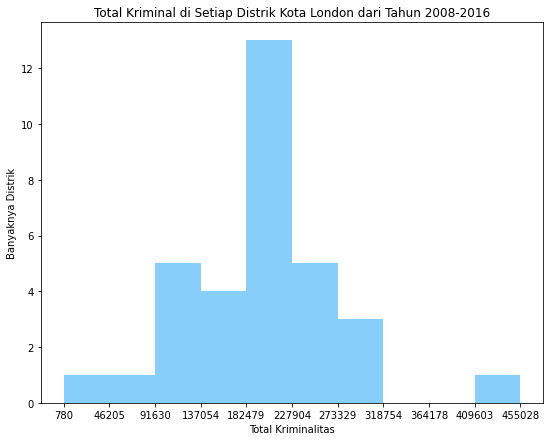

In [64]:
cr.plot(kind='hist', color='lightskyblue', figsize=(9,7), bins=10, xticks=bin_edges)

plt.title('Total Kriminal di Setiap Distrik Kota London dari Tahun 2008-2016')
plt.xlabel('Total Kriminalitas')
plt.ylabel('Banyaknya Distrik')

plt.show()

<b> INTERPRETASI: </b>\
Berdasarkan histogram di atas, terlihat terdapat 10 kelas dengan distribusi frekuensi sebagai berikut:
1. Terdapat 1 distrik dengan total kriminalitas di rentang 780-46204.8
2. Terdapat 1 distrik dengan total kriminalitas di rentang 46204.8-91629.6
3. Terdapat 5 distrik dengan total kriminalitas di rentang 91629.6-137054.4
4. Terdapat 4 distrik dengan total kriminalitas di rentang 137054.4-182479.2
5. Terdapat 13 distrik dengan total kriminalitas di rentang 182479.2-227904
6. Terdapat 5 distrik dengan total kriminalitas di rentang 227904-273328.8
7. Terdapat 3 distrik dengan total kriminalitas di rentang 273328.8-318753.6
8. Tidak ada distrik dengan total kriminalitas di rentang 318753.6-409603.2
9. Terdapat 1 distrik dengan total kriminalitas di rentang 409603.2-455028

---
### Area Plot
---

Tentukan 3 distrik dengan total catatan kriminalitas tertinggi!

In [102]:
crime

,date,borough,value
0,2012-07-28,Westminster,5428
1,2012-03-28,Westminster,5362
2,2011-12-28,Westminster,5333
3,2011-10-28,Westminster,5304
4,2011-11-28,Westminster,5277
...,...,...,...
3559,2009-09-28,City of London,0
3560,2008-04-28,City of London,0
3561,2009-04-28,City of London,0
3562,2010-05-28,City of London,0


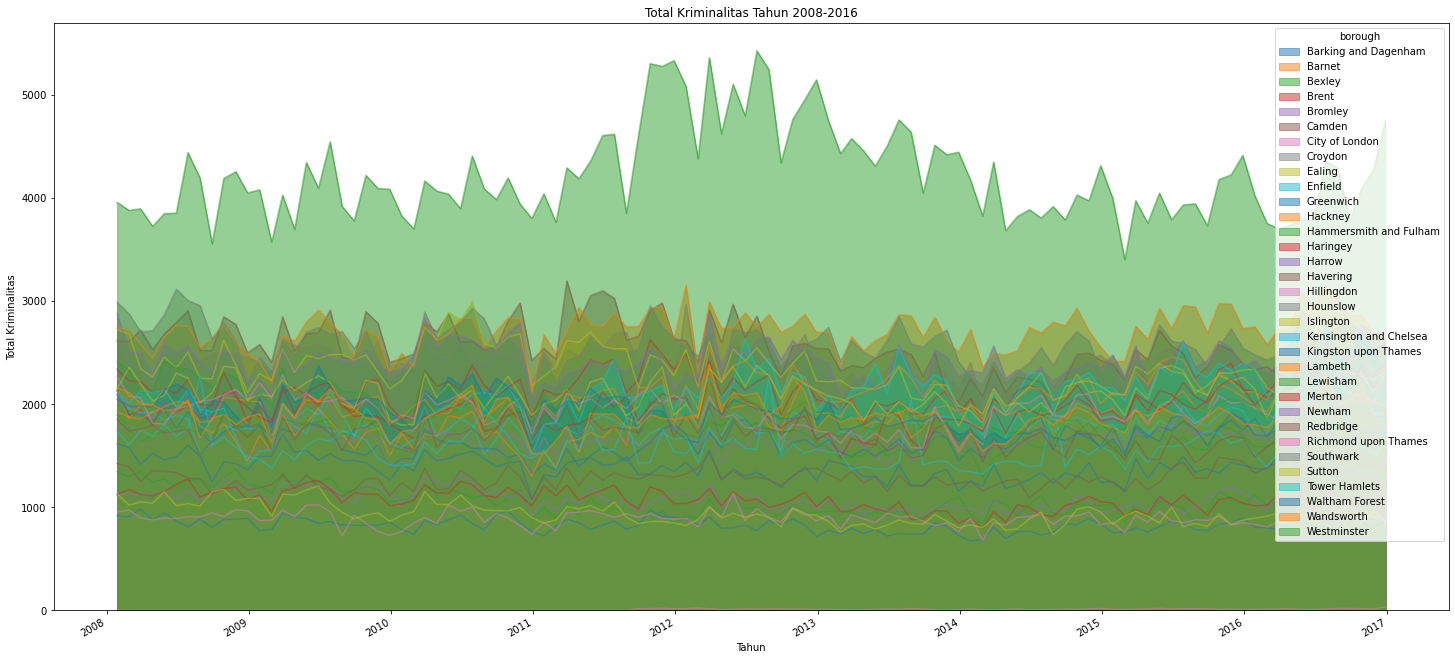

In [87]:
crime.pivot(index='date', columns='borough', values='value').plot(kind='area',stacked=False, figsize=(25,12))

plt.title('Total Kriminalitas Tahun 2008-2016')
plt.xlabel('Tahun')
plt.ylabel('Total Kriminalitas')

plt.show()

<b>INTERPRETASI:</b>\
Berdasarkan <i>area plot</i> di atas, terlihat distrik yang memiliki catatan kriminalitas tertinggi di setiap bulan dari tahun 2008 hingga 2017 merupakan distrik Westminster dengan selisih total kriminalitas yang cukup banyak dibandingkan dengan distrik yang lain. Posisi kedua dengan catatan kriminalitas tertinggi merupakan distrik Lambeth, terutama saat tahun 2012 hingga 2016. Distrik ketiga dengan catatan kriminalitas tertinggi merupakan distrik Southwark dengan puncak kriminalitas terjadi saat tahun 2011.

---
### Box Plot
---

Berdasarkan total kasus kriminal yang tercatat pada setiap bulan dari tahun 2008-2016, kasus kriminal yang manakah yang memiliki kasus kriminal terbanyak?

In [213]:
df_crime = pd.DataFrame(df.groupby(['major_category','borough'])['value'].sum().sort_values(ascending=False))
df_crime = df_crime.rename(index={'Burglary':'Crime-1','Criminal Damage':'Crime-2',
                                  'Drugs':'Crime-3','Fraud or Forgery':'Crime-4',
                                  'Other Notifiable Offences':'Crime-5','Robbery':'Crime-6',
                                  'Sexual Offences':'Crime-7','Theft and Handling':'Crime-8',
                                  'Violence Against the Person':'Crime-9'})
df_crime

value
major_category borough                     
Crime-8        Westminster           277617
               Camden                140596
               Lambeth               114899
               Southwark             109432
               Islington             107661
...                                     ...
Crime-7        Havering                  19
               Kingston upon Thames      18
Crime-5        City of London            17
Crime-2        City of London            16
Crime-1        City of London            15

[295 rows x 1 columns]

In [223]:
df_crimee = pd.DataFrame(df[df['major_category']=='Sexual Offences'].groupby(['borough'])['value'].sum().sort_values(ascending=False))
df_crimee

,value
borough,
Lewisham,71
Lambeth,70
Westminster,59
Greenwich,56
Croydon,55
Ealing,52
Barking and Dagenham,49
Wandsworth,47
Tower Hamlets,47


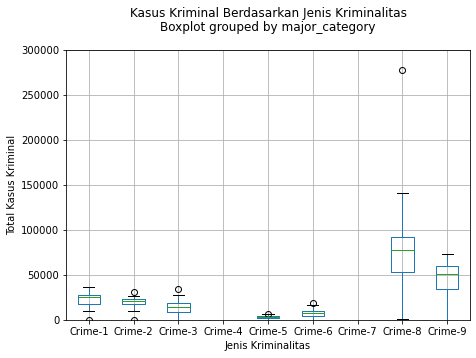

In [215]:
ax = df_crime.boxplot(column='value',by='major_category',figsize=(7,5))

ax.set_title('Kasus Kriminal Berdasarkan Jenis Kriminalitas',y=1.1)
ax.set_ylabel('Total Kasus Kriminal')
ax.set_xlabel('Jenis Kriminalitas')
ax.set_ylim([0,300000])

plt.show()

<b>Note:</b>
Berikut adalah keterangan dari label x:
* Crime-1: Burglary
* Crime-2: Criminal Damage
* Crime-3: Drugs
* Crime-4: Fraud of Forgery
* Crime-5: Other Notifiable Offences
* Crime-6: Robbery
* Crime-7: Sexual Offences
* Crime-8: Theft and Handling
* Crime-9: Violence Against the Person

<b>INTERPRETASI:</b>\
Berdasarkan <i>box plot</i> di atas, terlihat sebaran total kriminalitas kategori major di setiap distrik. Kriminalitas dengan total terbanyak adalah `Theft and Handling` dengan angka kasus berada di rentang 0 hingga kisaran 140000. Namun, di kasus ini terdapat nilai ekstrim atau nilai yang lebih dari Q3 + (3 x Inner Quartile Range). Nilai esktrim ini ditunjukkan oleh total kasus `Theft and Handling` pada distrik Westminster.\
Sedangkan, total kasus terkecil berasal dari `Sexual Offences` dengan angka kasus berada di bawah 100. Oleh karena itu, box plot untuk jenis kriminalitas ini tidak terlihat dikarenakan skalanya yang sangat kecil.

---
### Bar Chart
---

Pada tahun berapa dan bulan apa, distrik Westminster mencatat total kriminalitas tertinggi?

In [106]:
df_west = df[df['borough']=='Westminster'].groupby(['year']).sum()['value']
df_west

year
2008    47846
2009    48456
2010    48116
2011    54243
2012    59226
2013    53852
2014    47564
2015    47395
2016    48330
Name: value, dtype: int64

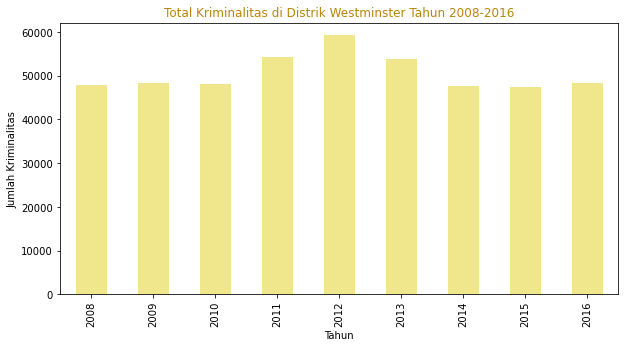

In [112]:
df_west.plot(kind='bar', color='khaki', figsize=(10,5))

plt.xlabel('Tahun')
plt.ylabel('Jumlah Kriminalitas')
plt.ylim(ymin=0)
plt.title('Total Kriminalitas di Distrik Westminster Tahun 2008-2016', color='darkgoldenrod')

plt.show()

In [113]:
df_month_west = df[(df['borough']=='Westminster') & (df['year']==2012)].groupby(['month']).sum()['value']
df_month_west

month
1     5084
2     4381
3     5362
4     4623
5     5104
6     4797
7     5428
8     5246
9     4341
10    4761
11    4952
12    5147
Name: value, dtype: int64

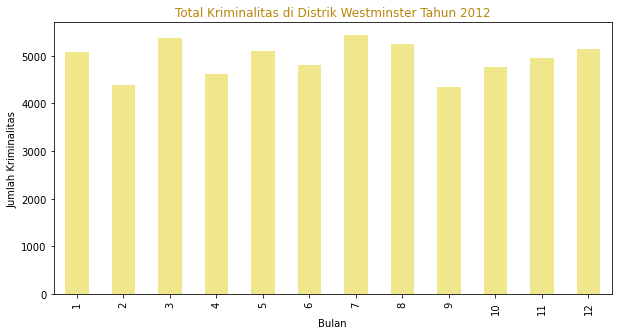

In [118]:
df_month_west.plot(kind='bar', color='khaki', figsize=(10,5))

plt.xlabel('Bulan')
plt.ylabel('Jumlah Kriminalitas')
plt.ylim(ymin=0)
plt.title('Total Kriminalitas di Distrik Westminster Tahun 2012', color='darkgoldenrod')

plt.show()

<b>INTERPRETASI:</b>\
Dari kedua <i>bar chart</i> di atas, terlihat total catatan kriminal setiap tahun dan bulannya di Distrik Westminster. Total kriminalitas terbanyak di Distrik Westminster terjadi pada bulan Juli tahun 2012 dengan total catatan kriminal sebanyak 5428 kasus.

---
### Pie Chart
---

Berapa persentase setiap kasus kriminal major terjadi di Distrik Westminster saat tahun 2008-2016?

In [180]:
df_major=pd.DataFrame(df[df['borough']=='Westminster'].groupby(['major_category'])['value'].sum())
df_major

,value
major_category,
Burglary,29295
Criminal Damage,20405
Drugs,34031
Fraud or Forgery,273
Other Notifiable Offences,6148
Robbery,15752
Sexual Offences,59
Theft and Handling,277617
Violence Against the Person,71448


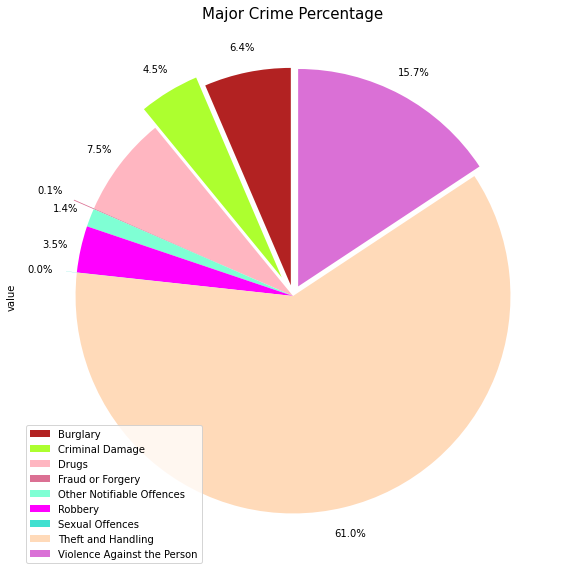

In [181]:
colors=['firebrick','greenyellow','lightpink','palevioletred',
       'aquamarine','fuchsia','turquoise','peachpuff',
       'orchid']
explode_list = [0.05,0.1,0,0.1,0,0,0.05,0,0.05]

df_major['value'].plot(kind='pie', colors=colors,labels=None,
                        figsize=(15,10), autopct='%1.1f%%',startangle=90,pctdistance=1.12,explode=explode_list)

plt.title('Major Crime Percentage', fontsize=15)

plt.legend(labels=df_major.index,loc='lower left')
plt.show()

<b>INTERPRETASI:</b>\
Berdasarkan <i>pie chart</i> di atas, dapat diperoleh beberapa informasi, yaitu:
1. Jenis kriminalitas kategori major `Theft and Handling` memiliki persentase terbesar, yaitu sebesar 61%. Hal itu berarti lebih dari setengah total kasus kriminal yang terjadi di Distrik Westminster merupakan kasus `Theft and Handling`.
2. `Sexual Offences` merupakan jenis kriminalitas kategori major terendah yang terjadi di Distrik Westminster dengan persentase sebesar 0.0%

---
### Scatter Plot
---

Berdasarkan total kriminalitas setiap distrik terdapat beberapa distrik yang nilainya cukup berdekatan, salah satunya adalah Southwark dan Camden. Keduanya memiliki total kasus di rentang nilai 270000. Bagaimana perbandingan total kasus tiap tahunnya antara kedua distrik tersebut?

In [262]:
# Memembuat data frame total kriminalitas setiap tahun yang terjadi di Camden dan Southwark
df_dist1 = df[df['borough'].isin(['Camden'])]
df_dist1 = pd.DataFrame(df_dist1.groupby(['year']).sum()['value'])
df_dist1 = df_dist1.reset_index().rename(columns={'value':'value1'})

df_dist2 = df[df['borough'].isin(['Southwark'])]
df_dist2 = pd.DataFrame(df_dist2.groupby(['year']).sum()['value'])
df_dist2 = df_dist2.reset_index().rename(columns={'value':'value2'})

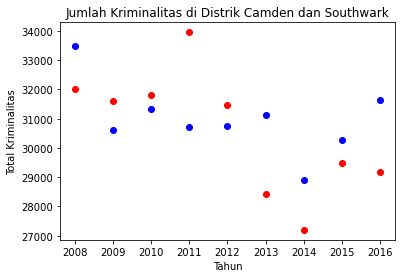

In [264]:
plt.scatter(df_dist1['year'],df_dist1['value1'],color='red')
plt.scatter(df_dist2['year'],df_dist2['value2'],color='blue')

plt.title('Jumlah Kriminalitas di Distrik Camden dan Southwark')
plt.xlabel('Tahun')
plt.ylabel('Total Kriminalitas')

plt.show()

<b>INTERPRETASI:</b>\
Berdasarkan <i>scatter plot</i> di atas, terlihat jumlah kriminalitas di Distrik Camden dan Southwark. Dari <i>scatter plot</i> di atas juga dapat ditarik beberapa kesimpulan sebagai berikut:
1. Total kasus tertinggi di Distrik Camden terjadi pada tahun 2011 dengan total sebesar 34000. Namun, di tahun-tahun berikutnya, Distrik Camden dapat menurunkan jumlah kasus kriminalitas yang terjadi, terutama pada tahun 2014 yang menyebabkan tahun tersebut menjadi tahun dengan kasus kriminalitas terendah di distriknya. Meskipun, terdapat kenaikan lagi pada tahun 2015, kenaikan tersebut tidaklah lebih tinggi dari tahun 2012 ke belakang.
2. Total kasus tertinggi di Distrik Southwark tidak lebih banyak daripada di Distrik Camden, yaitu berada di kisaran 33000. Akan tetapi, saat terjadi penurunan, angka kasus tidak jauh berbeda dari angka kasus yang tergolong tinggi di Distrik Camden. Bahkan, di beberapa tahun, total kriminalitas di Southwark masih jauh lebih tinggi dibandingkan di Distrik Camden. Salah satunya pada tahun 2013 yang menunjukkan angka kasus di Southwark berada di kisaran 31000, sedangkan toal kasus di Distrik Camden berada di kisaran 28000.

---
### WordCloud
---

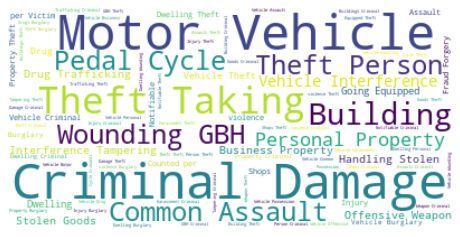

In [268]:
df_word = df[df['borough'].isin(['Westminster'])]
df_word = df_word['minor_category'].str.cat(sep=' ')

stopwords = set(STOPWORDS)

df_wordcloud = WordCloud(background_color='white', max_words=2000, stopwords=stopwords)

df_wordcloud.generate(df_word)

fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(12)

plt.imshow(df_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<b>INTERPRETASI:</b>\
Kata-kata yang ditampilkan pada word cloud di atas merupakan kata-kata yang berasal dari jenis kriminalitas kategori minor di Distrik Westminster.

---
### Folium Map
---

In [269]:
latitude = 51.509865
longitude = -0.118092

london_map = folium.Map(location=[latitude,longitude],zoom_start=12)
london_map

### Kesimpulan

Berdasarkan hasil visualisasi data yang telah dijabarkan di atas, dari data kejahatan yang terjadi di 33 distrik di London pada tahun 2008-2016, dapat ditarik beberapa kesimpulan sebagai berikut:
1. Terdapat 13490603 (sekitar 13 juta) laporan kriminalitas dari tahun 2008 hingga 2016 dari 4835 wilayah kepolisian yang ada di 33 distrik di London
2. Tiga distrik dengan catatan kasus kriminal terbanyak adalah Distrik Westminster, Distrik Lambeth, dan Distrik Southwark. Sedangkan, distrik dengan catatan kasus kriminal terendah adalah Distrik City of London.
3. Jenis kriminalitas major yang paling banyak terjadi di tiap distrik adalah `Theft and Handling`, terutama di Distrik Westminster. Bahkan, total kasus `Theft and Handling` di Distrik Westminster melebihi setengah dari total kasus yang terjadi di distrik tersebut atau dalam persentase sebesar 61%.
4. Total kriminalitas terbanyak di Distrik Westminster terjadi pada bulan Juli tahun 2012 dengan total catatan kriminal sebanyak 5428 kasus.